In [1]:
import os
import random
import shutil

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

import cv2

## Organize data structure

datasets/ <br>
  ├── images/<br>
  │   ├── train/<br>
  │   └── test/<br>
  └── labels/<br>
      ├── train/<br>
      └── test/<br>
* Paths to your organized dataset
* Paths for YOLO dataset structure
* Create directories if they don't exist

In [2]:
base_path = os.getcwd()
data_dir = os.path.join(base_path, "Data")

yolo_images_train  = os.path.join(base_path, "images/train")
yolo_images_test  = os.path.join(base_path, "images/test")
yolo_labels_train = os.path.join(base_path, "labels/train")
yolo_labels_test = os.path.join(base_path, "labels/test")
annotations_save_path = os.path.join(base_path, "annotations")

os.makedirs(yolo_images_train, exist_ok = True)
os.makedirs(yolo_images_test, exist_ok = True)
os.makedirs(yolo_labels_train, exist_ok = True)
os.makedirs(yolo_labels_test, exist_ok = True)

* Get a list of all image files in the dataset
* Shuffle the list of images
* Split the data: 80% training, 20% testing
* Function to move files
    * Move training files
    * Move testing files

In [ ]:
image_files = [f for f in os.listdir(data_dir) if f.endswith(".jpg")]

random.shuffle(image_files)

split_index = int(0.8 * len(image_files))
train_files = image_files[:split_index]
test_files = image_files[split_index:]

def move_files(files, src_dir, img_dest_dir, lbl_dest_dir):
    for file in files:
        if file.endswith(".jpg"):
            src_img_path = os.path.join(src_dir, file)
            dest_img_path = os.path.join(img_dest_dir, file)
            shutil.copy2(src_img_path, dest_img_path)
            print(f'copied {src_img_path} to {dest_img_path}')
            
            txt_file = file.replace(".jpg", ".txt")
            src_txt_path = os.path.join(src_dir, txt_file)
            dest_txt_path = os.path.join(lbl_dest_dir, txt_file)
            if os.path.exists(src_txt_path):
                shutil.copy2(src_txt_path, dest_txt_path)
                print(f'Copied {src_txt_path} to {dest_txt_path}')
                
move_files(train_files, data_dir, yolo_images_train, yolo_labels_train)

move_files(test_files, data_dir, yolo_images_test, yolo_labels_test)

print(f'Training set: {len(train_files)} images')
print(f'Testing set: {len(test_files)} images')
print('Dataset reorganized for YOLO.')

copied D:\AI\Documents\Programming\RDD\Data\CPLX_G0066704.jpg to D:\AI\Documents\Programming\RDD\images/train\CPLX_G0066704.jpg
Copied D:\AI\Documents\Programming\RDD\Data\CPLX_G0066704.txt to D:\AI\Documents\Programming\RDD\labels/train\CPLX_G0066704.txt
copied D:\AI\Documents\Programming\RDD\Data\Japan_007413.jpg to D:\AI\Documents\Programming\RDD\images/train\Japan_007413.jpg
Copied D:\AI\Documents\Programming\RDD\Data\Japan_007413.txt to D:\AI\Documents\Programming\RDD\labels/train\Japan_007413.txt
copied D:\AI\Documents\Programming\RDD\Data\Norway_007733.jpg to D:\AI\Documents\Programming\RDD\images/train\Norway_007733.jpg
Copied D:\AI\Documents\Programming\RDD\Data\Norway_007733.txt to D:\AI\Documents\Programming\RDD\labels/train\Norway_007733.txt
copied D:\AI\Documents\Programming\RDD\Data\Japan_012148.jpg to D:\AI\Documents\Programming\RDD\images/train\Japan_012148.jpg
Copied D:\AI\Documents\Programming\RDD\Data\Japan_012148.txt to D:\AI\Documents\Programming\RDD\labels/train\J

## Visualize the data
* Function to read bounding boxes from a file
* Function to visualize bounding boxes on an image
    * Convert relative coordinates to absolute coordinates
    * Calculate the top-left corner of the bounding box
    * Create a Rectangle patch

In [4]:
def read_bounding_boxes(file_path):
    bounding_boxes = []
    with open(file_path, "r") as file:
        lines = file.readlines()
        for line in lines:
            parts = line.strip().split()
            object_class = int(parts[0])
            x_center = float(parts[1])
            y_center = float(parts[2])
            width = float(parts[3])
            height = float(parts[4])
            bounding_boxes.append((object_class, x_center, y_center, width, height))
    return bounding_boxes

def visualize_bounding_boxes(image_path, bounding_boxes, save_path):
    image = Image.open(image_path)
    image_width, image_height = image.size
    
    fig, ax = plt.subplots(1)
    ax.imshow(image)
    
    for box in bounding_boxes:
        object_class, x_center, y_center, width, height = box
        
        abs_x_center = x_center * image_width
        abs_y_center = y_center * image_height
        abs_width = width * image_width
        abs_height = height * image_height
        
        top_left_x = abs_x_center - (abs_width / 2)
        top_left_y = abs_y_center - (abs_height / 2)
        
        rect = patches.Rectangle((top_left_x, top_left_y), abs_width, abs_height, linewidth = 1, edgecolor = "r", facecolor = "none")
        ax.add_patch(rect)
        
    image_name = os.path.basename(image_path)
    plt.title(image_name)
    plt.axis('off')
    plt.show()
    
    save_image_path = os.path.join(save_path, image_name)
    plt.savefig(save_image_path, bbox_inches = "tight", pad_inches = 0)
    plt.close(fig)

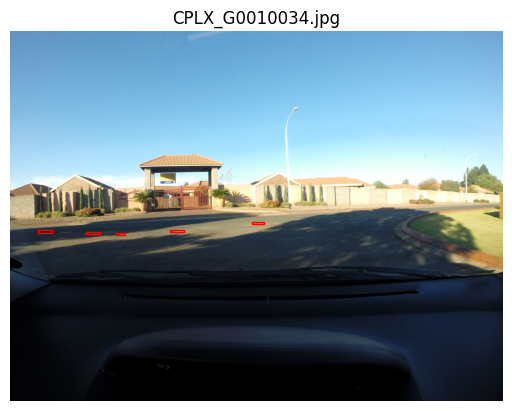

<Figure size 640x480 with 0 Axes>

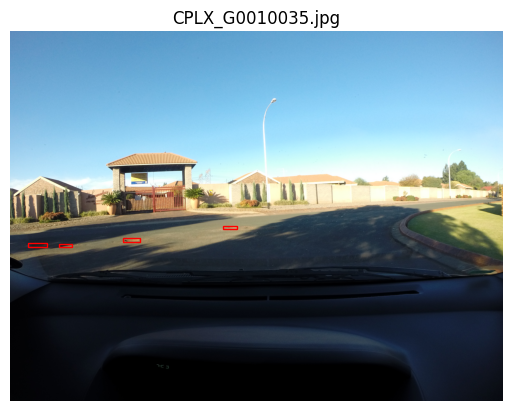

<Figure size 640x480 with 0 Axes>

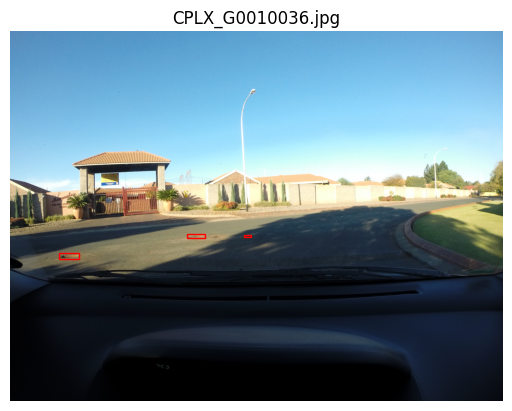

<Figure size 640x480 with 0 Axes>

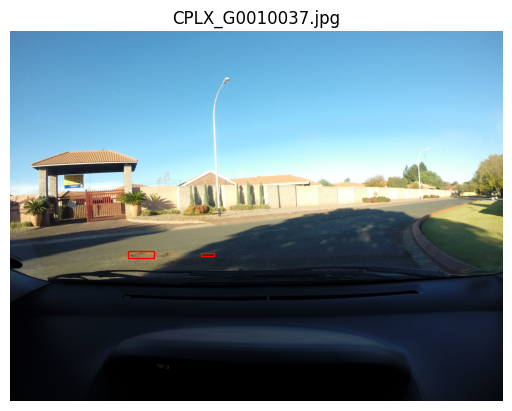

<Figure size 640x480 with 0 Axes>

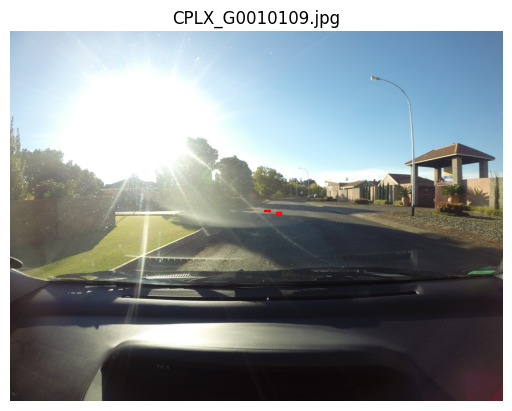

<Figure size 640x480 with 0 Axes>

In [37]:
num_images_to_visualize = 5
image_files = [f for f in os.listdir(yolo_images_train) if f.endswith(".jpg")]
image_files = image_files[:num_images_to_visualize]

for image_file in image_files:
    image_path = os.path.join(yolo_images_train, image_file)
    label_file = image_file.replace(".jpg", ".txt")
    label_path = os.path.join(yolo_labels_train, label_file)
    
    if os.path.exists(label_path):
        bounding_boxes = read_bounding_boxes(label_path)
        visualize_bounding_boxes(image_path, bounding_boxes, annotations_save_path)

In [39]:
os.getcwd()

'D:\\AI\\Documents\\Programming\\Road Defect'